<div style="text-align:center; background-color:#FFF3CD; padding: 20px; border-radius: 5px;">
  <span style="color:#4C6A92; font-size:38px; font-weight:bold;">Insurance Cost Estimator Project</span>
</div>

<span style="color:#4C6A92; font-size:32px; font-weight:bold;">Life Cycle of a Machine Learning Project</span>

<span style="color:#28A745; font-weight:bold;">1) Problem Statement</span>  
    - Define the objective of the project and the business problem to solve.

<span style="color:#28A745; font-weight:bold;">2) Data Collection</span>  
    - Gather the relevant dataset(s) from various sources.

<span style="color:#28A745; font-weight:bold;">3) Data Validation and Checks</span>  
    - Perform checks for data quality, completeness, and integrity.

<span style="color:#28A745; font-weight:bold;">4) Exploratory Data Analysis (EDA)</span>  
    - Analyze the data using statistical summaries and visualizations to uncover patterns and insights.

<span style="color:#28A745; font-weight:bold;">5) Data Preprocessing</span>  
    - Handle missing values, outliers, feature encoding, scaling, and splitting into train-test datasets.

<span style="color:#28A745; font-weight:bold;">6) Model Training and Evaluation</span>  
    - Train various machine learning models and evaluate their performance using appropriate metrics.

<span style="color:#28A745; font-weight:bold;">7) Model Selection and Hyperparameter Tuning</span>  
    - Choose the best-performing model and fine-tune its hyperparameters for optimal results.

<span style="color:#28A745; font-weight:bold;">8) Feature Importance Analysis</span>  
    - Identify and rank the most significant features contributing to model performance.

<span style="color:#28A745; font-weight:bold;">9) Model Refinement with Significant Features</span>  
    - Retrain the model using only the most important features to simplify and optimize the model.

<span style="color:#28A745; font-weight:bold;">10) XAI - SHAP</span>  
    - Explain model predictions by quantifying the impact of each feature.

<span style="color:#28A745; font-weight:bold;">11) Building the Application</span>  
    - Develop an interface (e.g., web or mobile app) to use the trained model for predictions.

<span style="color:#28A745; font-weight:bold;">12) Deployment</span>  
    - Deploy the model and application to a production environment for real-world use.


<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">1) Problem Statement</span>
</div>

The goal of this project is to predict the **insurance cost** for individuals based on their demographic and health-related information. The dataset contains a variety of features, including personal characteristics such as age, gender, body mass index (BMI), smoking status, and region. The task is to develop a machine learning model that can accurately predict the insurance cost incurred by an individual, based on these factors.

<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">2) Data Collection</span>
</div>

- Dataset Source - https://www.kaggle.com/datasets/awaiskaggler/insurance-csv
- The data consists of 6 columns and 1338 rows

#### 2.1 Import Data and Required Packages
#####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import zipfile
from urllib.request import urlretrieve
from pathlib import Path

from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'statsmodels'

In [4]:
import statsmodels
print(statsmodels.__version__)

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
insurance_data = pd.read_csv('insurance.csv')
df = insurance_data.copy()

##### Show Top 5 Records of the Dataset (head, tail, sample)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df.sample(5)

,age,sex,bmi,children,smoker,region,expenses
793,53,male,20.9,0,yes,southeast,21195.82
767,42,female,29.0,1,no,southwest,7050.64
553,52,female,31.7,2,no,northwest,11187.66
546,28,male,35.4,0,no,northeast,3268.85
72,53,female,28.1,3,no,southwest,11741.73


##### Shape of the Dataset

In [6]:
df.shape

(1338, 7)

##### Dataset information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


1. **Age**  
   - **Type**: Integer  
   - **Description**: Represents the age of the individual.  
   - **Range**: 18 to 64 years  
2. **Sex**  
   - **Type**: Categorical (object)  
   - **Description**: Gender of the individual.  
   - **Values**: `male`, `female`  
3. **BMI**  
   - **Type**: Float  
   - **Description**: Body Mass Index (BMI) is a measure of body fat based on height and weight.  
   - **Range**: Approximately 16.00 to 53.1  
4. **Children**  
   - **Type**: Integer  
   - **Description**: Number of children or dependents the individual has.  
   - **Range**: 0 to 5  
5. **Smoker**  
   - **Type**: Categorical (object)  
   - **Description**: Indicates if the individual is a smoker.  
   - **Values**: `yes`, `no`  
6. **Region**  
   - **Type**: Categorical (object)  
   - **Description**: The geographical region where the individual resides.  
   - **Values**: `northeast`, `northwest`, `southeast`, `southwest`  
7. **Expenses**  
   - **Type**: Float  
   - **Description**: The insurance cost incurred by the individual.  
   - **Range**: Approximately 1121.87 to 63770.43

<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">3) Data Validation and Checks
</span>
</div>

##### Data Checks to Perform (Before Splitting the Data)

- 3.1) Check Missing Values  
- 3.2) Check Duplicates  
- 3.3) Check Data Type  
- 3.4) Check the Number of Unique Values in Each Column  
- 3.5) Check Statistics of the Dataset  
- 3.6) Check Categories in Categorical Columns  
- 3.7) Check for Outliers  
- 3.8) Check Data Imbalance (for Target Variable, for Classification problem)  
- 3.9) Check Data Consistency  
- 3.10) Check for Skewness in Numerical Columns  
- 3.11) Check for Multicollinearity  
- 3.12) Check for Feature Relationships

##### 3.1) Check Missing Values

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<div style="color:#008B8B; font-size:24px;">
There are no missing values in the data set.
</div>

##### 3.2) Check Duplicates

In [10]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 1


In [11]:
print(f"Display duplicated rows along with index")
df[df.duplicated(keep=False)]

Display duplicated rows along with index


,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [12]:
df = df.drop_duplicates()
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


<div style="color:#008B8B; font-size:24px;">
There is one duplicated row and it has been removed.
</div>

##### 3.3) Check Data Type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [14]:
# Check for Mixed Data Types:
for col in df.columns:
    print(f"{col}: {df[col].apply(type).nunique()} unique types")

age: 1 unique types
sex: 1 unique types
bmi: 1 unique types
children: 1 unique types
smoker: 1 unique types
region: 1 unique types
expenses: 1 unique types


In [15]:
# Identify Columns with Constant Values:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() == 1:
        print(f"Column '{col}' has a single unique value.")
    else:
        print(f"Column '{col}' has {df[col].nunique()} unique values.")

Column 'sex' has 2 unique values.
Column 'smoker' has 2 unique values.
Column 'region' has 4 unique values.


<div style="color:#008B8B; font-size:24px;">
- The dataset contains 1337 entries and 7 columns with appropriate data types.<br>
- Columns are categorized as: <br>
        o Numerical: int64 (age, children) and float64 (bmi, expenses). <br>
        o Categorical: object (sex, smoker, region). <br>
- Data types are consistent, and there are no mixed data types. No column has a constant value.
</div>

##### 3.4) Check the Number of Unique Values in Each Column 

In [16]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

##### 3.5) Check Statistics of the Dataset 

In [17]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


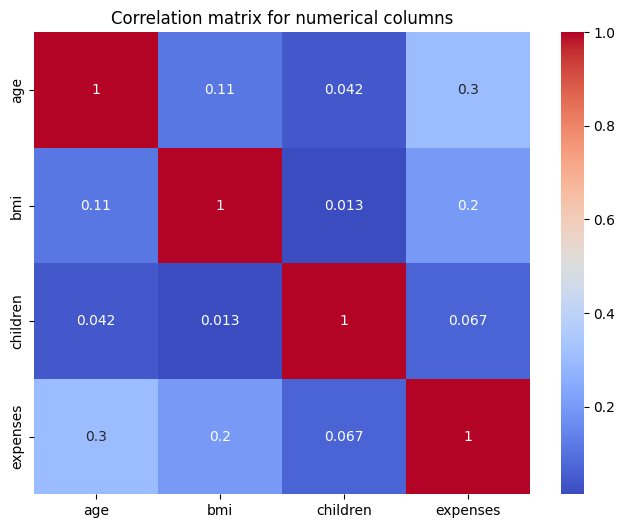

In [18]:
# Select only numerical columns
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix for numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix for numerical columns")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- Independent Variables: There is very weak correlation between the independent variables (age, bmi, children), indicating they are largely independent of each other.<br>
- Independent vs Dependent (expenses): Age shows a moderate positive correlation with expenses (0.30), while BMI has a weak positive correlation (0.20), and children shows almost no correlation with expenses (0.07).<br>
</div>

##### 3.6) Check Categories in Categorical Columns 

In [19]:
for col in df.select_dtypes(include='object'):
    print(f"Number of unique values in column '{col}': {df[col].nunique()}")
    print(f"Categories in column '{col}': {df[col].unique()} \n")

Number of unique values in column 'sex': 2
Categories in column 'sex': ['female' 'male'] 

Number of unique values in column 'smoker': 2
Categories in column 'smoker': ['yes' 'no'] 

Number of unique values in column 'region': 4
Categories in column 'region': ['southwest' 'southeast' 'northwest' 'northeast'] 



<div style="color:#008B8B; font-size:24px;">
- 'Sex' column contains two categories: 'male' and 'female'. <br>
- 'Smoker' column contains two categories: 'yes' and 'no'.<br>
- 'Region' column contains four categories: 'southeast', 'southwest', 'northeast', and 'northwest'.<br>
- All categorical columns have consistent categories with no unexpected or inconsistent values.<br>
</div>

##### 3.7) Check for Outliers

In [20]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if pd.api.types.is_numeric_dtype(df[feature])]

discrete_numerical_features = [feature for feature in numerical_features if df[feature].nunique() < 20]

continuous_numerical_features = [feature for feature in numerical_features if df[feature].nunique() >= 20]

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# print column names
print(f'There are {len(numerical_features)} numerical features : {numerical_features}')
print(f'\nThere are {len(discrete_numerical_features)} discrete numerical features : {discrete_numerical_features}')
print(f'\nThere are {len(continuous_numerical_features)} continuos numerical features : {continuous_numerical_features}')
print(f'\nThere are {len(categorical_features)} categorical features : {categorical_features}')

There are 4 numerical features : ['age', 'bmi', 'children', 'expenses']

There are 1 discrete numerical features : ['children']

There are 3 continuos numerical features : ['age', 'bmi', 'expenses']

There are 3 categorical features : ['sex', 'smoker', 'region']


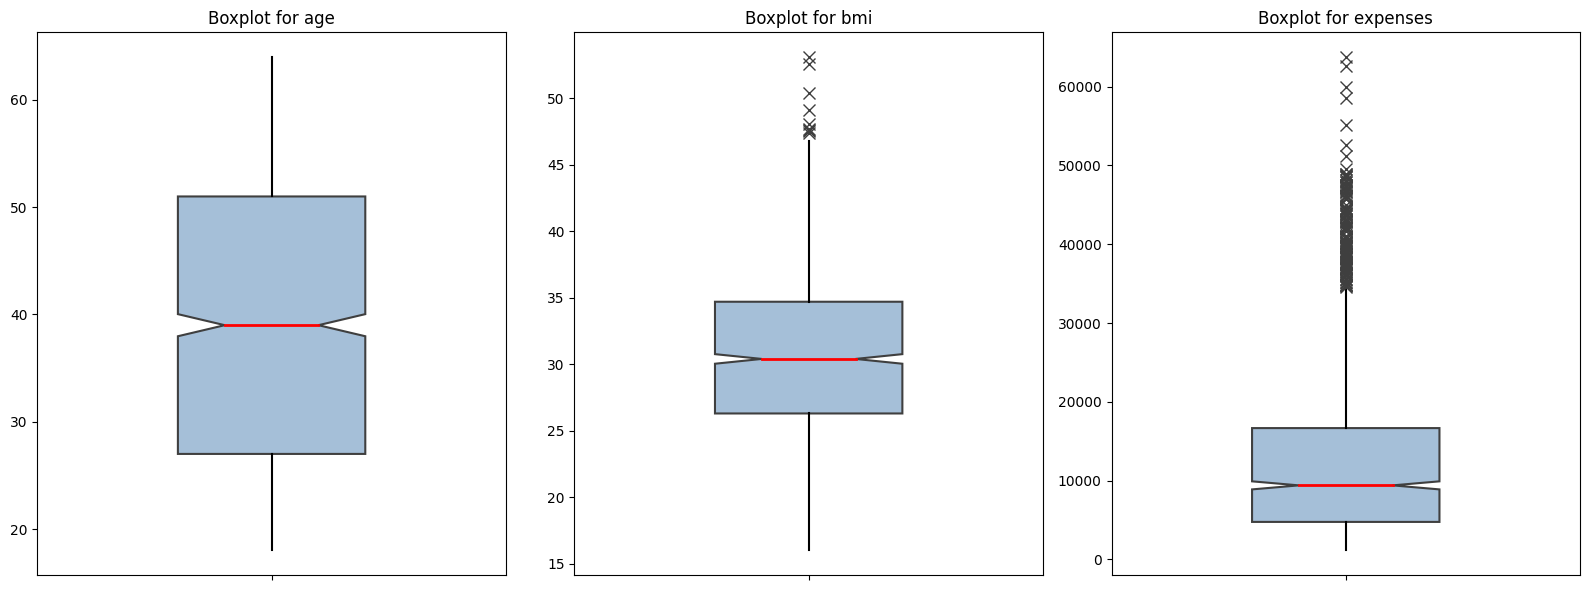

In [21]:
# Create a figure with subplots in one row
fig, axes = plt.subplots(1, len(continuous_numerical_features), figsize=(16, 6))

# Iterate through numerical features and plot each one
for i, feature in enumerate(continuous_numerical_features):
    sns.boxplot(
        y=df[feature], 
        ax=axes[i], 
        notch=True,  # Add notch to the boxplot
        showcaps=False,  # Hide the caps
        flierprops={"marker": "x", "color": "r", "markersize": 8},  # Customizing outliers
        boxprops={"facecolor": (.3, .5, .7, .5)},  # Set the box color with transparency
        medianprops={"color": "r", "linewidth": 2},  # Customize the median line
        whiskerprops={"color": "black", "linewidth": 1.5},  # Customize whiskers
        width=0.4  # Shrink the box width
    )
    axes[i].set_title(f'Boxplot for {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust the layout to make sure all plots are well spaced
plt.tight_layout()
plt.show()


In [22]:
# Calculate Z-scores
z_scores = zscore(df[continuous_numerical_features])

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores > 3) | (z_scores < -3)

outlier_rows = df[outliers.any(axis=1)]  # This will show the rows with outliers
print(outlier_rows.head(5))


     age     sex   bmi  children smoker     region  expenses
34    28    male  36.4         1    yes  southwest  51194.56
116   58    male  49.1         0     no  southeast  11381.33
543   54  female  47.4         0    yes  southeast  63770.43
577   31  female  38.1         1    yes  northeast  58571.07
819   33  female  35.5         0    yes  northwest  55135.40


In [23]:
# Calculate IQR for each numerical feature
Q1 = df[continuous_numerical_features].quantile(0.25)
Q3 = df[continuous_numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers based on IQR
outliers = ((df[continuous_numerical_features] < (Q1 - 1.5 * IQR)) | (df[continuous_numerical_features] > (Q3 + 1.5 * IQR)))

outlier_rows = df[outliers.any(axis=1)]  # This will show the rows with outliers
print(outlier_rows.head(5))


    age     sex   bmi  children smoker     region  expenses
14   27    male  42.1         0    yes  southeast  39611.76
19   30    male  35.3         0    yes  southwest  36837.47
23   34  female  31.9         1    yes  northeast  37701.88
29   31    male  36.3         2    yes  southwest  38711.00
30   22    male  35.6         0    yes  southwest  35585.58


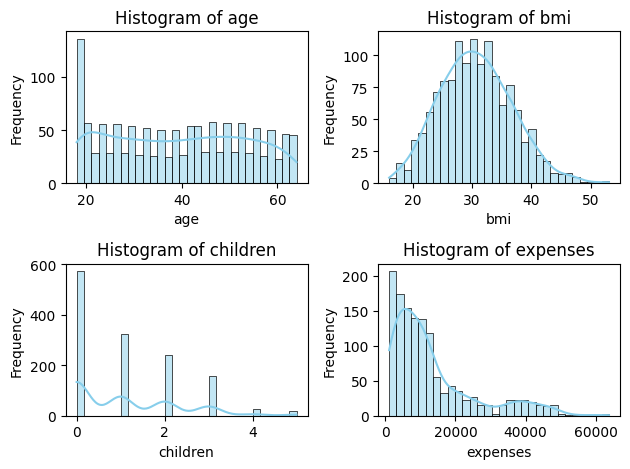

In [24]:
# Loop through the numerical features to plot individual histograms
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns of plots
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

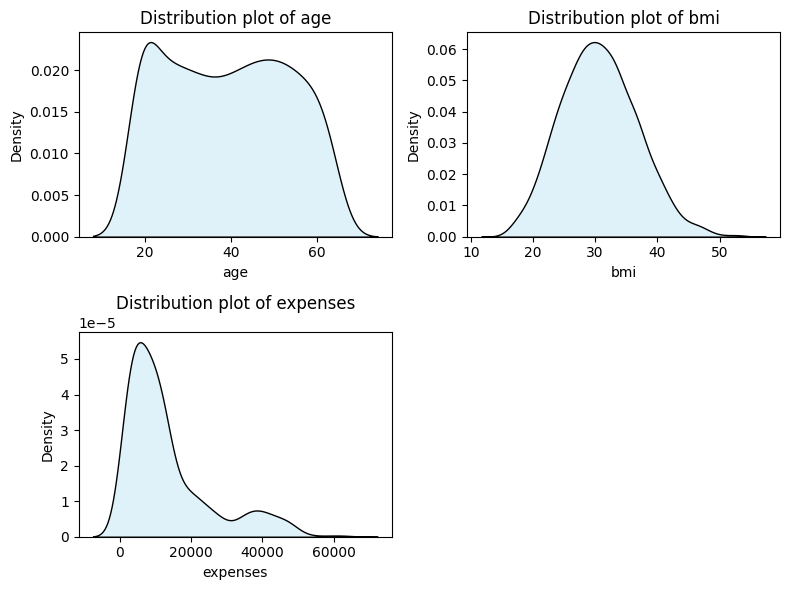

In [25]:
# Create a figure with subplots
plt.figure(figsize=(8, 6))

# Loop through the numerical features to plot distribution plots
for i, feature in enumerate(continuous_numerical_features, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns of plots
    sns.kdeplot(df[feature], fill=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

##### 3.8) Check Data Imbalance (for Target Variable, for Classification problem) 

##### 3.9) Check Data Consistency

##### 3.10) Check for Skewness in Numerical Columns 

In [26]:
for feature in continuous_numerical_features:
    skewness = df[feature].skew()
    if abs(skewness) > 1:
        print(f"'{feature}' is highly skewed with skewness: {skewness:.2f}")


'expenses' is highly skewed with skewness: 1.52


##### 3.11) Check for Multicollinearity  

In [27]:
# Compute VIF for each numerical feature

X = df[continuous_numerical_features]
X = add_constant(X)  # Add a constant column for VIF calculation

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


    Feature        VIF
0     const  31.698241
1       age   1.100845
2       bmi   1.044079
3  expenses   1.132345


<div style="color:#008B8B; font-size:24px;"> - The Variance Inflation Factor (VIF) values for all numerical features are close to 1, indicating no multicollinearity among the features. - Multicollinearity is not a concern in this dataset, and no features need to be removed or combined. - The constant column (`const`) shows a high VIF value, which is expected and can be safely ignored. </div>

##### 3.12) Check for Feature Relationships

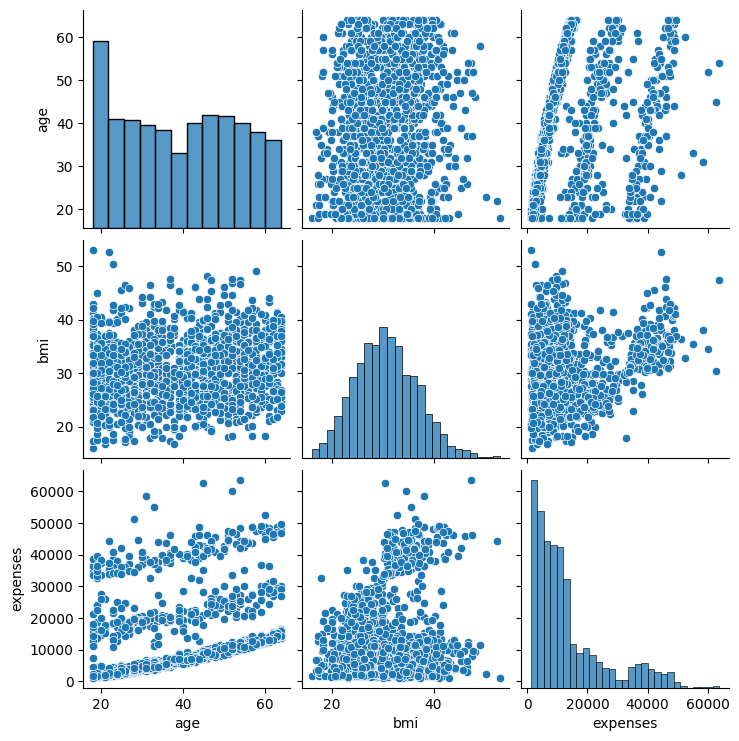

In [28]:
sns.pairplot(df[continuous_numerical_features], hue='smoker', palette='husl')
plt.show()

<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">4) Exploratory Data Analysis (EDA)</span>
</div>

4.1) What is the age distribution of individuals in the dataset?

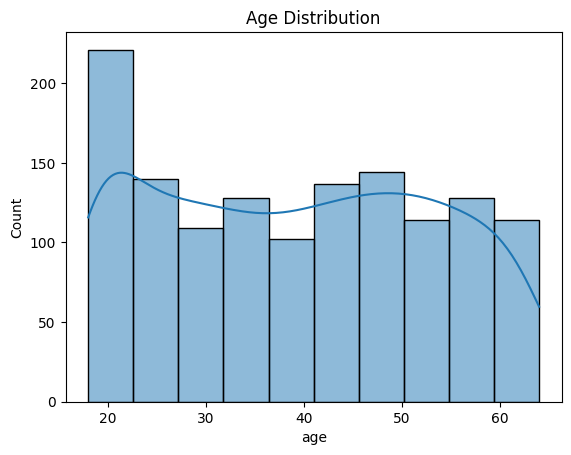

In [29]:
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The age distribution shows that individuals in the dataset are spread across a wide range, with a higher concentration in the range 20 to 23y.  <br>
- The distribution appears relatively uniform, with no significant skewness or outliers.  <br>
- This suggests that the dataset contains a good representation of different age groups.
</div>


4.2) How does BMI vary across the dataset? Are there signs of overweight or obesity?

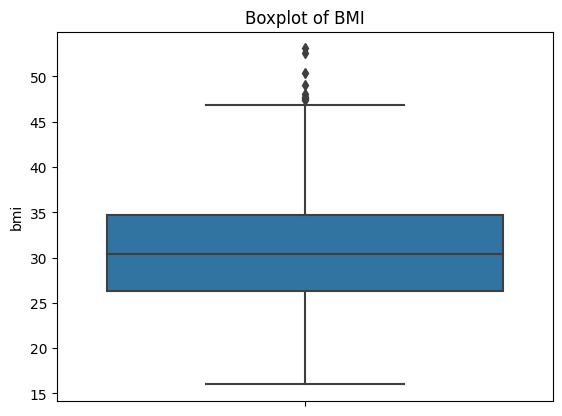

In [30]:
sns.boxplot(y=df['bmi'])
plt.title("Boxplot of BMI")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The BMI distribution shows a moderate concentration around the 25–35 range, which is indicative of overweight individuals.<br>  
- A significant portion of individuals lies above the obesity threshold (BMI > 30). <br> 
- The presence of some outliers in the boxplot suggests a few extreme BMI values.
</div>


4.3) What is the distribution of insurance expenses (target variable)? Is it skewed?

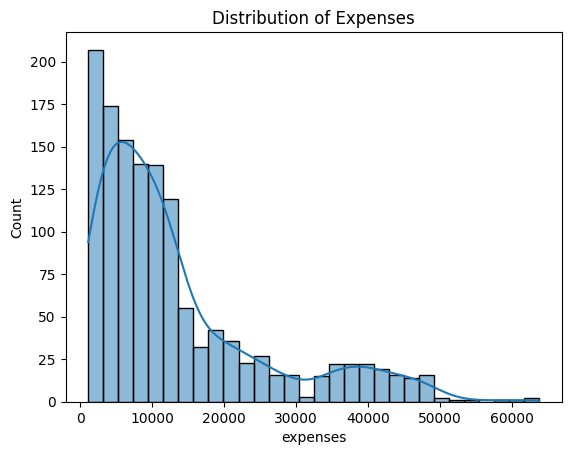

In [31]:
sns.histplot(df['expenses'], bins=30, kde=True)
plt.title("Distribution of Expenses")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The distribution of insurance expenses is right-skewed, with a large number of individuals having lower expenses and a few having very high expenses.  <br>
- This skewness indicates that a small number of individuals are driving the high-end expenses, potentially influenced by smoking or other risk factors.  
</div>


4.4) How many smokers vs. non-smokers are in the dataset?

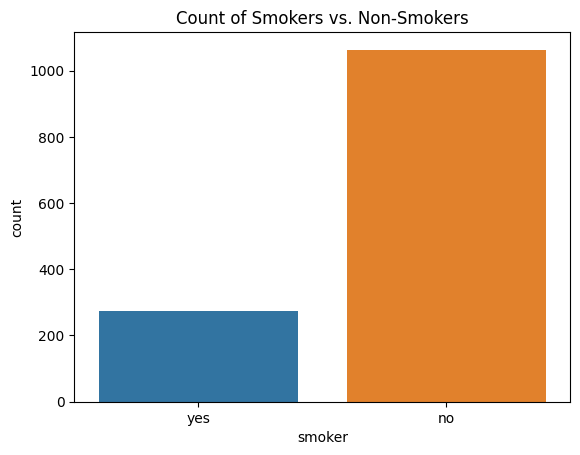

In [32]:
sns.countplot(x='smoker', data=df)
plt.title("Count of Smokers vs. Non-Smokers")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The dataset contains more non-smokers than smokers, indicating an imbalance in the smoking status. <br> 
- This suggests that the majority of individuals in the dataset do not smoke, which may influence expenses and other health metrics. <br> 
</div>


4.5) How does BMI differ between smokers and non-smokers?

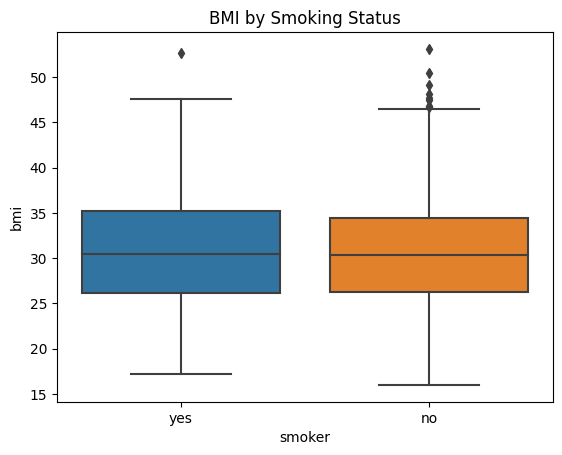

In [33]:
sns.boxplot(x='smoker', y='bmi', data=df)
plt.title("BMI by Smoking Status")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The BMI distribution for smokers and non-smokers shows no significant difference, with both groups having similar median values.  <br>
- However, smokers tend to have a slightly higher variance in BMI, as shown by the spread in the boxplot.  <br>
- This indicates that BMI alone may not be significantly impacted by smoking status.
</div>

4.6) How do insurance expenses vary for smokers vs. non-smokers?

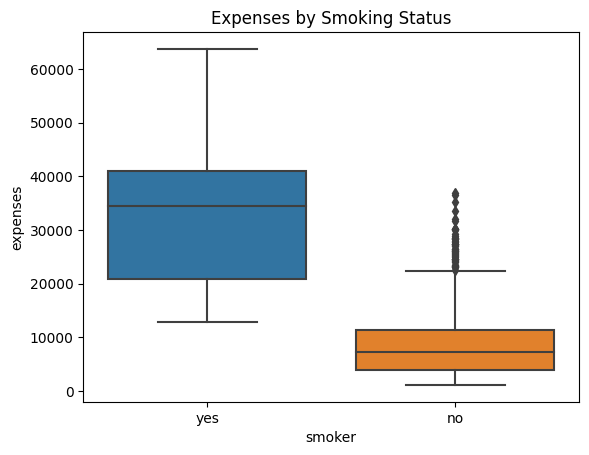

In [34]:
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title("Expenses by Smoking Status")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- Smokers have significantly higher insurance expenses compared to non-smokers, as indicated by the boxplot. <br>  
- The median expenses for smokers are notably higher.  <br>
- Smoking appears to be a major factor influencing insurance expenses.
</div>


4.7) What is the distribution of regions in the dataset? Which region has the most observations?

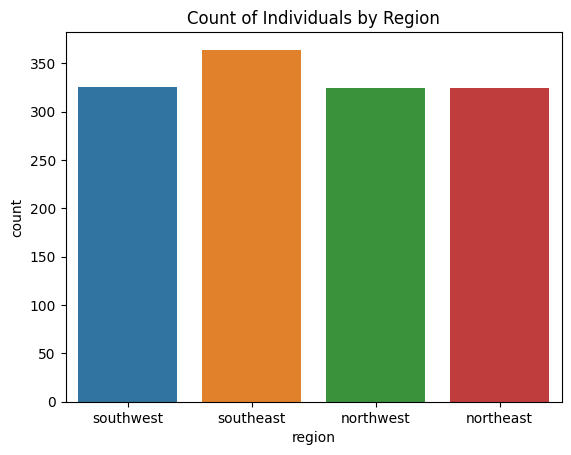

In [35]:
sns.countplot(x='region', data=df)
plt.title("Count of Individuals by Region")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The distribution of regions is relatively balanced, with all regions having a comparable number of observations.  <br>
- No single region dominates the dataset, ensuring fairness in region-based analysis.  <br>
- This suggests the dataset is well-represented geographically.
</div>


4.8) How does the average insurance expense vary by region?

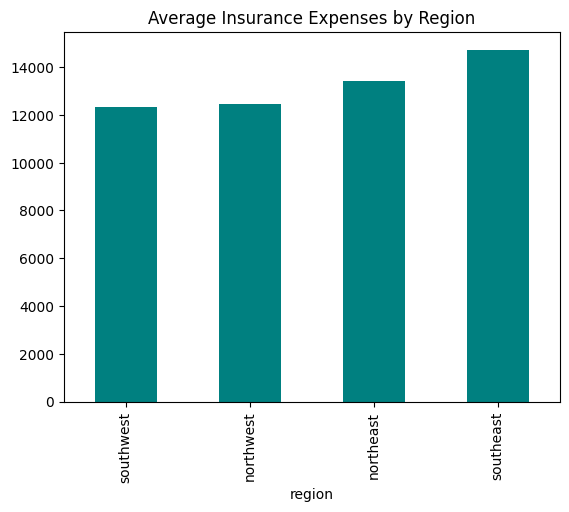

In [36]:
region_expenses = df.groupby('region')['expenses'].mean().sort_values()
region_expenses.plot(kind='bar', color='teal')
plt.title("Average Insurance Expenses by Region")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The average insurance expenses vary across regions, with the southeast region showing the highest expenses.  <br>
- This difference may be attributed to regional lifestyle, health factors, or the prevalence of smokers.  <br>
- Further investigation can reveal the specific factors contributing to higher expenses in certain regions.
</div>

4.9) How does the number of children impact insurance expenses?

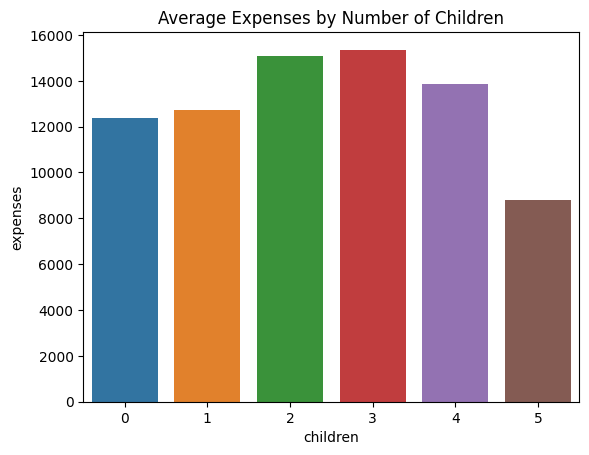

In [37]:
sns.barplot(x='children', y='expenses', data=df, errorbar=None)
plt.title("Average Expenses by Number of Children")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- Insurance expenses show an irregular trend with the number of children, as expenses are unexpectedly higher for families with 3 children and lower for families with 5 children. <br>
- This highlights that the number of children alone does not explain expenses, and other influencing factors like smoking play a major role.
</div>


4.10) Is there a relationship between age and expenses?

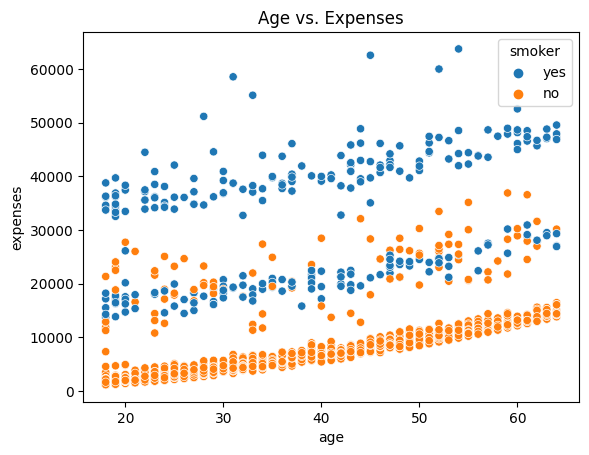

In [38]:
sns.scatterplot(x='age', y='expenses', hue='smoker', data=df)
plt.title("Age vs. Expenses")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- There is a positive relationship between age and expenses, with older individuals generally having higher expenses.  <br>
- The trend is more pronounced among smokers, who incur significantly higher expenses regardless of age.  <br>
- This highlights the combined effect of age and smoking on insurance costs.
</div>


4.11) Does BMI correlate with expenses? Are there any patterns for smokers vs. non-smokers?

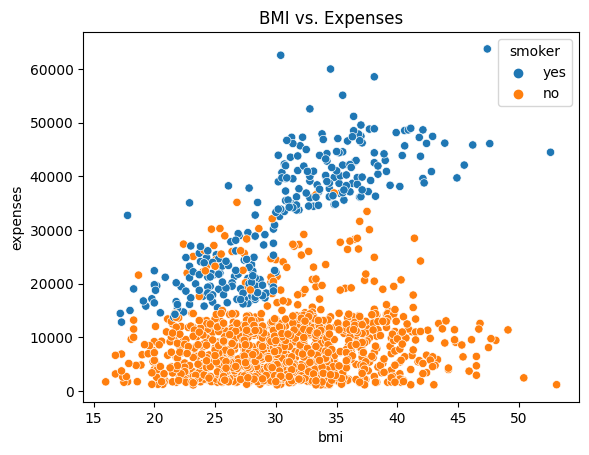

In [39]:
sns.scatterplot(x='bmi', y='expenses', hue='smoker', data=df)
plt.title("BMI vs. Expenses")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- BMI shows a weak positive correlation with expenses, meaning higher BMI slightly increases expenses.<br>  
- Smokers with high BMI tend to have higher expenses compared to non-smokers.  <br>
- This suggests that BMI, especially for smokers, contributes to elevated insurance costs.
</div>


4.12) How does the age distribution differ for smokers vs. non-smokers?

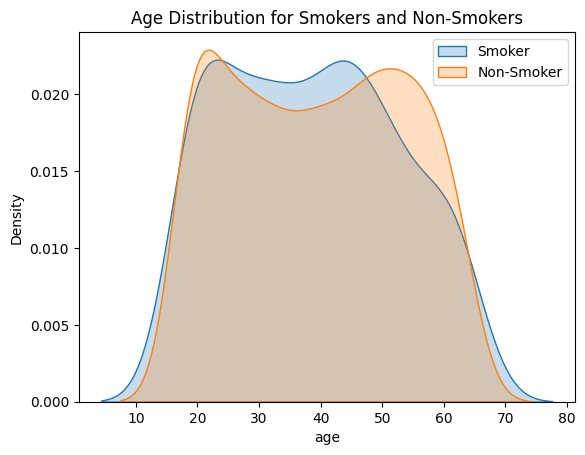

In [40]:
sns.kdeplot(df[df['smoker'] == 'yes']['age'], label='Smoker', fill=True)
sns.kdeplot(df[df['smoker'] == 'no']['age'], label='Non-Smoker', fill=True)
plt.title("Age Distribution for Smokers and Non-Smokers")
plt.legend()
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The age distribution for smokers and non-smokers is similar, with both groups having a concentration in the mid-20s to mid-40s.  <br>
- However, smokers show a slightly higher proportion in older age brackets.  <br>
- This suggests that smoking habits may persist across different age groups.
</div>


4.13) How does the average BMI differ between regions?

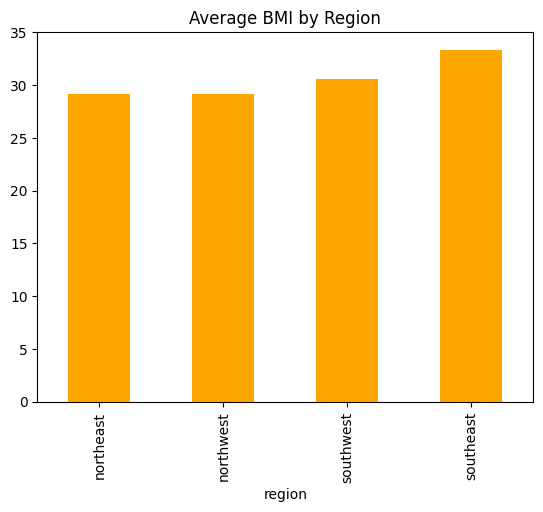

In [41]:
region_bmi = df.groupby('region')['bmi'].mean().sort_values()
region_bmi.plot(kind='bar', color='orange')
plt.title("Average BMI by Region")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The average BMI is relatively consistent across regions, with no substantial variation.  <br>
- This indicates that regional factors have minimal impact on BMI distribution.  <br>
</div>


4.14) What is the relationship between age and BMI?

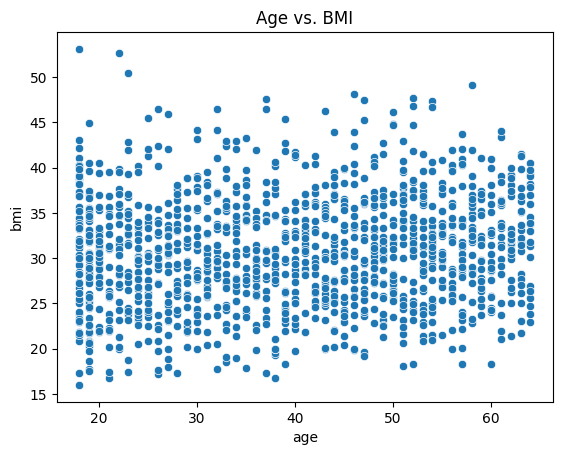

In [42]:
sns.scatterplot(x='age', y='bmi', data=df)
plt.title("Age vs. BMI")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- Age and BMI show no strong correlation, as indicated by the scatter plot.  <br>
- Individuals across all age groups have similar BMI values, with no clear trend observed.  <br>
- This suggests that age is not a major determinant of BMI in the dataset.
</div>


4.15) How do expenses vary by region for smokers and non-smokers?

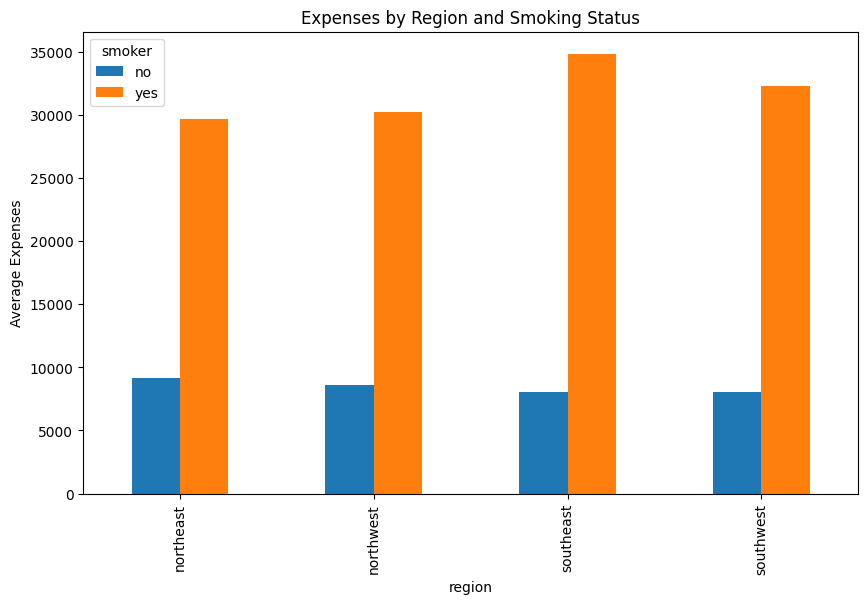

In [43]:
region_smoker_expenses = df.pivot_table(values='expenses', index='region', columns='smoker', aggfunc='mean')
region_smoker_expenses.plot(kind='bar', figsize=(10, 6))
plt.title("Expenses by Region and Smoking Status")
plt.ylabel("Average Expenses")
plt.show()

<div style="color:#008B8B; font-size:24px;">
- Across all regions, smokers incur significantly higher expenses compared to non-smokers.  <br>
- The southeast region shows the highest expenses for smokers, reinforcing its association with elevated costs.  <br>
- This highlights the combined impact of region and smoking status on expenses.
</div>


<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">5) Data Preprocessing</span>
</div>

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import joblib

In [45]:
print(numerical_features)
print(categorical_features)

['age', 'bmi', 'children', 'expenses']
['sex', 'smoker', 'region']


In [46]:
test_size=0.25
random_state=42

In [47]:
train_data, test_data = train_test_split(df, test_size=test_size, random_state=random_state)
print(f"Shape of train_data: {train_data.shape}")
print(f"Shape of test_data: {test_data.shape}")

Shape of train_data: (1002, 7)
Shape of test_data: (335, 7)


In [48]:
X_train = train_data.drop(columns='expenses', axis='columns') #X_train = train_data.iloc[:,:-1]
y_train = train_data['expenses']  #y_train = train_data.iloc[:,-1]

X_test = test_data.drop(columns='expenses', axis='columns') #X_test = test_data.iloc[:,:-1]
y_test = test_data['expenses']  #y_test = test_data.iloc[:,-1]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1002, 6)
Shape of y_train: (1002,)
Shape of X_test: (335, 6)
Shape of y_test: (335,)


In [49]:
# Define features based on X_train
numerical_features_train = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_features_train = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Print the features
print('Numerical features in X_train:', numerical_features_train)
print('Categorical features in X_train:', categorical_features_train)

Numerical features in X_train: ['age', 'bmi', 'children']
Categorical features in X_train: ['sex', 'smoker', 'region']


In [50]:
# Initialize an empty dictionary to store the label encoders for each categorical feature
label_encoders = {}

# Loop through each categorical feature and apply label encoding
for col in categorical_features_train:
    le = LabelEncoder()  # Create a new instance of LabelEncoder for each feature
    X_train[col]  = le.fit_transform(X_train[col])  # Fit and transform the feature in X_train
    label_encoders[col] = le  # Save the encoder for later use

# Define a pipeline for numerical features, applying StandardScaler for normalization
numerical_pipeline = Pipeline(
    [
        ('scaler', StandardScaler())  # Step: Scale the numerical features
    ]
)

# Define a pipeline for categorical features, applying StandardScaler for scaling
categorical_pipeline = Pipeline(
    [
        ('scaler', StandardScaler())  # Step: Scale the categorical features
    ]
)

# Define a ColumnTransformer to apply the appropriate pipeline to each set of features
preprocessor = ColumnTransformer(
    [
        ('numeric', numerical_pipeline, numerical_features_train),  # Apply the numerical pipeline to numerical features
        ('categoric', categorical_pipeline, categorical_features_train)  # Apply the categorical pipeline to categorical features
    ]
)

# Fit and transform X_train using the preprocessor (scaling the features)
X_train_processed = preprocessor.fit_transform(X_train)

# Output the shape of X_train after preprocessing to check the result
print("Shape of X_train after preprocessing:", X_train_processed.shape)

# Save the preprocessor pipeline to a file for future use
joblib.dump(preprocessor, 'preprocessor_pipeline.joblib')

# Save the label encoders to a file for later use on the test data
joblib.dump(label_encoders, 'label_encoders.joblib')

# Confirm that the preprocessor pipeline and label encoders were saved successfully
print("Preprocessor pipeline and label encoders saved.")

Shape of X_train after preprocessing: (1002, 6)
Preprocessor pipeline and label encoders saved.


In [51]:
# Load saved objects
#preprocessor = joblib.load('preprocessor_pipeline.joblib')
#label_encoders = joblib.load('label_encoders.joblib')


# Apply Label Encoding to X_test
for col, le in label_encoders.items():
    X_test[col] = le.transform(X_test[col])  # Use the saved encoder

# Apply preprocessing pipeline to X_test
X_test_processed = preprocessor.transform(X_test)

print("Shape of X_test after preprocessing:", X_test_processed.shape)

Shape of X_test after preprocessing: (335, 6)


<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">6) Model Training and Evaluation</span>
</div>

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [53]:
# Defining the models to be trained with random_state where applicable
base_models = {
    "linear_regression": LinearRegression(),
    "lasso_regression": Lasso(),
    "ridge_regression": Ridge(),
    "elasticnet_regression": ElasticNet(),
    "knn_regression": KNeighborsRegressor(),
    "svm_regression": SVR(),
    "dt_regression": DecisionTreeRegressor(random_state=random_state),
    "adaboost_regression": AdaBoostRegressor(random_state=random_state),
    "gradient_boosting_regression": GradientBoostingRegressor(random_state=random_state),
    "rf_regression": RandomForestRegressor(random_state=random_state),
    "xgb_regression": XGBRegressor(random_state=random_state),
    "catboost_regression": CatBoostRegressor(random_state=random_state, verbose=0)  
}


In [54]:
#------------------Evaluate base Estimators----------------------
def evaluate_base_estimators(X_train, y_train, X_test, y_test, base_models):
    """
    Train base estimators (default settings) and evaluate performance.
    
    Args:
        X_train: Training features
        y_train: Training target
        X_test: Testing features
        y_test: Testing target
        base_models: Dictionary of base estimators with their model names and objects
    
    Returns:
        report: Dictionary containing train/test R², RMSE, and MAE scores for each model
    """
    # Initialize an empty dictionary to store results
    report = {}

    # Loop through each base model
    for model_name, model in base_models.items():
        
        # Train the model on training data
        model.fit(X_train, y_train)

        # Make predictions on training and testing data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate R² score, RMSE, and MAE for train/test
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        # Store evaluation metrics
        report[model_name] = {
            'train_r2_score': train_r2,
            'test_r2_score': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae
        }

    return report

In [55]:
base_models_evaluation_report = evaluate_base_estimators(X_train_processed, y_train, X_test_processed, y_test, base_models)

In [56]:
# Convert evaluation report to DataFrame
report_df = pd.DataFrame(base_models_evaluation_report).T  # Transpose for better readability
print(report_df)

                              train_r2_score  test_r2_score    train_rmse  \
linear_regression                   0.729470       0.796230   6100.864545   
lasso_regression                    0.729470       0.796195   6100.865061   
ridge_regression                    0.729470       0.796060   6100.873123   
elasticnet_regression               0.646183       0.667572   6977.075302   
knn_regression                      0.859986       0.851049   4389.038276   
svm_regression                     -0.099459      -0.116518  12299.101332   
dt_regression                       1.000000       0.735651      0.000000   
adaboost_regression                 0.828461       0.861995   4858.087517   
gradient_boosting_regression        0.894416       0.880277   3811.381378   
rf_regression                       0.974135       0.868247   1886.434989   
xgb_regression                      0.996288       0.847896    714.605575   
catboost_regression                 0.945936       0.871510   2727.326522   

In [57]:
def plot_model_metrics(report_df, metrics, title, ylabel, colors):
    """
    Plots selected metrics (train/test) for models from the evaluation report.

    Args:
        report_df: DataFrame containing model evaluation results.
        metrics: List of columns to plot (e.g., ['train_r2_score', 'test_r2_score']).
        title: Title of the plot.
        ylabel: Label for the y-axis.
        colors: List of colors for the bars.
    """
    plt.figure(figsize=(10, 6))
    report_df[metrics].plot(kind='bar', color=colors, edgecolor='black')

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Models')
    plt.xticks(rotation=45, ha='right')
    plt.legend(metrics)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

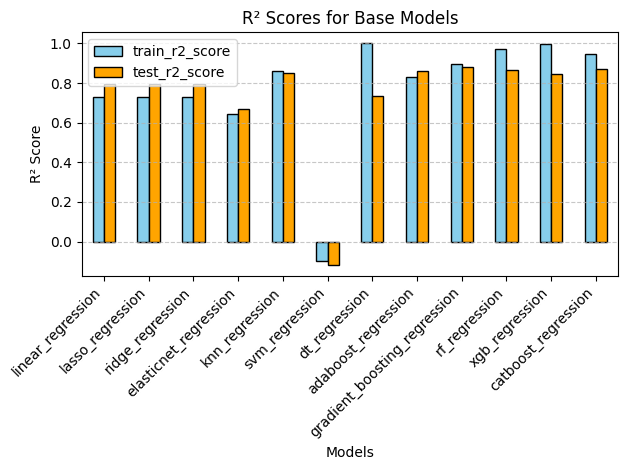

In [58]:
plot_model_metrics(
    report_df=report_df,
    metrics=['train_r2_score', 'test_r2_score'],
    title='R² Scores for Base Models',
    ylabel='R² Score',
    colors=['skyblue', 'orange']
)


<Figure size 1000x600 with 0 Axes>

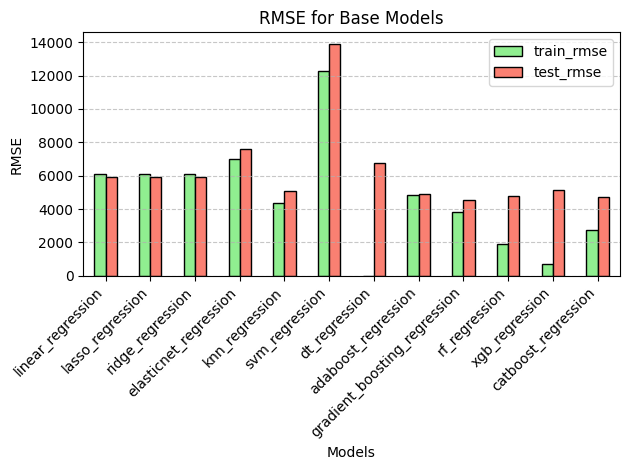

In [59]:
plot_model_metrics(
    report_df=report_df,
    metrics=['train_rmse', 'test_rmse'],
    title='RMSE for Base Models',
    ylabel='RMSE',
    colors=['lightgreen', 'salmon']
)

<Figure size 1000x600 with 0 Axes>

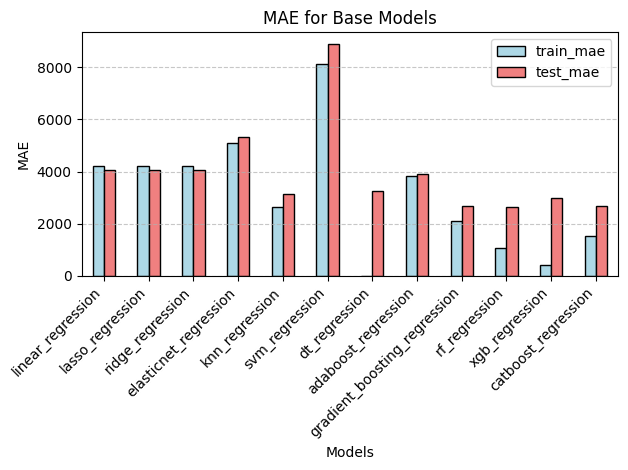

In [60]:
plot_model_metrics(
    report_df=report_df,
    metrics=['train_mae', 'test_mae'],
    title='MAE for Base Models',
    ylabel='MAE',
    colors=['lightblue', 'lightcoral']
)


<div style="color:#008B8B; font-size:24px;">
- Gradient Boosting Regression has the highest Test R² score of 0.8803, explaining 88% of the variance in the test data. <br>
- It achieves the lowest Test RMSE of 4549.86, indicating predictions are closer to the actual values. <br>
- Its Test MAE of 2673.26 is competitive compared to other models. <br>
- Gradient Boosting Regression strikes a balance between R², RMSE, and MAE, making it the most reliable model overall. <br>
- This model has been selected for hyperparameter tuning to further improve its performance.
</div>


<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">7) Model Selection and Hyperparameter Tuning
</span>
</div>

In [61]:
train_r2_base = report_df.loc['gradient_boosting_regression','train_r2_score']
train_rmse_base = report_df.loc['gradient_boosting_regression','train_rmse']
train_mae_base = report_df.loc['gradient_boosting_regression','train_mae']

test_r2_base = report_df.loc['gradient_boosting_regression','test_r2_score']
test_rmse_base = report_df.loc['gradient_boosting_regression','test_rmse']
test_mae_base = report_df.loc['gradient_boosting_regression','test_mae']

In [62]:
# Hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=random_state), 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Fit GridSearchCV to training data
grid_search.fit(X_train_processed, y_train)

# Best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model from GridSearchCV
y_train_pred_best = best_model.predict(X_train_processed)
y_test_pred_best = best_model.predict(X_test_processed)

# Evaluate best model
train_r2_best = r2_score(y_train, y_train_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)
train_rmse_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
train_mae_best = mean_absolute_error(y_train, y_train_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)

# Display results comparison
print("Base Model Evaluation Results:")
print(f"Train R²: {train_r2_base:.4f}, Test R²: {test_r2_base:.4f}")
print(f"Train RMSE: {train_rmse_base:.4f}, Test RMSE: {test_rmse_base:.4f}")
print(f"Train MAE: {train_mae_base:.4f}, Test MAE: {test_mae_base:.4f}")

print("\nBest Model Evaluation Results After Hyperparameter Tuning:")
print(f"Train R²: {train_r2_best:.4f}, Test R²: {test_r2_best:.4f}")
print(f"Train RMSE: {train_rmse_best:.4f}, Test RMSE: {test_rmse_best:.4f}")
print(f"Train MAE: {train_mae_best:.4f}, Test MAE: {test_mae_best:.4f}")

print("\nBest Hyperparameters from GridSearchCV:")
print(best_params)

# Save the model
joblib.dump(best_model, 'best_model.joblib')

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Base Model Evaluation Results:
Train R²: 0.8944, Test R²: 0.8803
Train RMSE: 3811.3814, Test RMSE: 4549.8642
Train MAE: 2090.2090, Test MAE: 2673.2613

Best Model Evaluation Results After Hyperparameter Tuning:
Train R²: 0.8765, Test R²: 0.8889
Train RMSE: 4121.6692, Test RMSE: 4382.3157
Train MAE: 2280.9945, Test MAE: 2516.4025

Best Hyperparameters from GridSearchCV:
{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}


['best_model.joblib']

<div style="color:#008B8B; font-size:24px;">
- The base Gradient Boosting Regression model achieved a test R² score of 0.8803, which indicates it explained approximately 88% of the variance in the test data. <br>
- After hyperparameter tuning using GridSearchCV, the test R² improved slightly to 0.8889, which shows a small increase in the model's ability to explain variance. <br>
- The test RMSE reduced from 4549.86 (base model) to 4382.32 (best model), indicating that the tuned model's predictions are closer to actual values. <br>
- The test MAE decreased from 2673.26 (base model) to 2516.40 (best model), showing that the tuned model's errors are lower. <br>
- The hyperparameters found after tuning were: learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8. <br>
- Although the improvements are modest, the tuned model shows slightly better generalization and error reduction compared to the base model. <br>
- The Gradient Boosting model with hyperparameter tuning is recommended for further exploration.
</div>



<div style="background-color:None; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:None;">Prediction for a single instance</span>
</div>

In [63]:
# Simulating a single instance of user input for prediction
user_input = {
    "age": [random.randint(20, 60)],  # Random age between 20 and 60
    "sex": [random.choice(["male", "female"])],  # Randomly selects either "male" or "female"
    "smoker": [random.choice(["yes", "no"])],  # Randomly selects smoking status: "yes" or "no"
    "bmi": [round(random.uniform(15.0, 35.0), 1)],  # Random BMI value between 15.0 and 35.0, rounded to 1 decimal
    "children": [random.randint(0, 4)],  # Random number of children between 0 and 4
    "region": [random.choice(["southwest", "southeast", "northeast", "northwest"])]  # Randomly selects a region
}

# Print the simulated user input
print(user_input)

{'age': [59], 'sex': ['female'], 'smoker': ['no'], 'bmi': [18.1], 'children': [1], 'region': ['southwest']}


In [64]:
# Convert the simulated user input dictionary into a DataFrame
user_input_df = pd.DataFrame(user_input)

# Display the resulting DataFrame
user_input_df

,age,sex,smoker,bmi,children,region
0,59,female,no,18.1,1,southwest


In [65]:
# Load saved objects
#preprocessor = joblib.load('preprocessor_pipeline.joblib')
#label_encoders = joblib.load('label_encoders.joblib')
# Apply Label Encoding to user_input_df
# Iterate through each column and apply the corresponding label encoder (le) from the saved encoders
for col, le in label_encoders.items():
    # Use the saved encoder to transform the column data (converts categorical data to numeric labels)
    user_input_df[col] = le.transform(user_input_df[col])  

# Apply preprocessing pipeline to user_input_df
# The 'preprocessor' transforms the data
user_input_df_processed = preprocessor.transform(user_input_df)

In [66]:
# Load saved objects
#best_model = joblib.load('best_model.joblib')

# Make prediction using the best model
# The model is used to predict the insurance cost based on the preprocessed input data
prediction = best_model.predict(user_input_df_processed)

# Print the predicted insurance cost (rounded to two decimal places)
print(f"Predicted Insurance Cost: {prediction[0]:.2f}")

Predicted Insurance Cost: 15790.52


<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">8) Feature Importance Analysis</span>
</div>

In [67]:
# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # feature names
    'Importance': feature_importances  # importance scores
})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

    Feature  Importance
4    smoker    0.677735
1       sex    0.181354
0       age    0.124071
2       bmi    0.013362
5    region    0.002947
3  children    0.000530


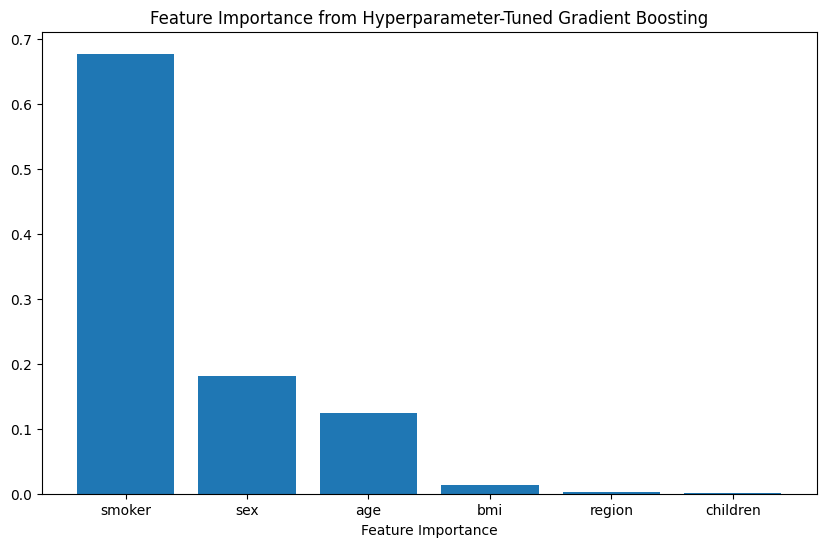

In [68]:
# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Hyperparameter-Tuned Gradient Boosting')
plt.show()

<div style="color:#008B8B; font-size:24px;">
- The features 'region', and 'children' have low feature importance values, suggesting that they do not significantly contribute to the model's performance. <br>
- Given their minimal impact, these features can be considered for removal to simplify the model without sacrificing predictive accuracy. <br>
- It is advisable to test the model's performance after removing these features to confirm there is no negative impact on the results.
</div>

<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">9) Model Refinement with Significant Features</span>
</div>

In [69]:
# Remove unwanted features
X_train_reduced_feat = X_train.drop(columns=['region', 'children'])
X_test_reduced_feat = X_test.drop(columns=['region', 'children'])
print(f"Shape of X_train with reduced features: {X_train_reduced_feat.shape}")
print(f"Shape of X_test with reduced features: {X_test_reduced_feat.shape}")

Shape of X_train with reduced features: (1002, 4)
Shape of X_test with reduced features: (335, 4)


In [70]:
# Modify preprocessor to handle only the selected features
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('age', StandardScaler(), ['age']),
        ('sex', StandardScaler(), ['sex']),
        ('bmi', StandardScaler(), ['bmi']),
        ('smoker',StandardScaler(), ['smoker'])

    ]
)

# Apply the preprocessing on the reduced dataset
X_train_reduced_processed = preprocessor_reduced.fit_transform(X_train_reduced_feat)
X_test_reduced_processed = preprocessor_reduced.transform(X_test_reduced_feat)

# Check the shape of the processed data
print(f"Shape of processed X_train: {X_train_reduced_processed.shape}")
print(f"Shape of processed X_test: {X_test_reduced_processed.shape}")

Shape of processed X_train: (1002, 4)
Shape of processed X_test: (335, 4)


In [71]:
best_model_reduced_features = GradientBoostingRegressor(**best_params)
# Fit the best model with reduced features on the processed training data
best_model_reduced_features.fit(X_train_reduced_processed, y_train)

# Make predictions for the best model with reduced features
y_train_pred_best_reduced_feat = best_model_reduced_features.predict(X_train_reduced_processed)
y_test_pred_best_reduced_feat = best_model_reduced_features.predict(X_test_reduced_processed)

# Calculate metrics for the best model with reduced features
train_r2_best_reduced_feat = r2_score(y_train, y_train_pred_best_reduced_feat)
test_r2_best_reduced_feat = r2_score(y_test, y_test_pred_best_reduced_feat)
train_rmse_best_reduced_feat = np.sqrt(mean_squared_error(y_train, y_train_pred_best_reduced_feat))
test_rmse_best_reduced_feat = np.sqrt(mean_squared_error(y_test, y_test_pred_best_reduced_feat))
train_mae_best_reduced_feat = mean_absolute_error(y_train, y_train_pred_best_reduced_feat)
test_mae_best_reduced_feat = mean_absolute_error(y_test, y_test_pred_best_reduced_feat)

# Display all three sets of results

print("Base Model Evaluation Results:")
print(f"Train R²: {train_r2_base:.4f}, Test R²: {test_r2_base:.4f}")
print(f"Train RMSE: {train_rmse_base:.4f}, Test RMSE: {test_rmse_base:.4f}")
print(f"Train MAE: {train_mae_base:.4f}, Test MAE: {test_mae_base:.4f}")

print("\nBest Model Evaluation Results After Hyperparameter Tuning:")
print(f"Train R²: {train_r2_best:.4f}, Test R²: {test_r2_best:.4f}")
print(f"Train RMSE: {train_rmse_best:.4f}, Test RMSE: {test_rmse_best:.4f}")
print(f"Train MAE: {train_mae_best:.4f}, Test MAE: {test_mae_best:.4f}")

print("\nBest Model with Reduced Features Evaluation Results:")
print(f"Train R²: {train_r2_best_reduced_feat:.4f}, Test R²: {test_r2_best_reduced_feat:.4f}")
print(f"Train RMSE: {train_rmse_best_reduced_feat:.4f}, Test RMSE: {test_rmse_best_reduced_feat:.4f}")
print(f"Train MAE: {train_mae_best_reduced_feat:.4f}, Test MAE: {test_mae_best_reduced_feat:.4f}")


Base Model Evaluation Results:
Train R²: 0.8944, Test R²: 0.8803
Train RMSE: 3811.3814, Test RMSE: 4549.8642
Train MAE: 2090.2090, Test MAE: 2673.2613

Best Model Evaluation Results After Hyperparameter Tuning:
Train R²: 0.8765, Test R²: 0.8889
Train RMSE: 4121.6692, Test RMSE: 4382.3157
Train MAE: 2280.9945, Test MAE: 2516.4025

Best Model with Reduced Features Evaluation Results:
Train R²: 0.8668, Test R²: 0.8864
Train RMSE: 4280.2570, Test RMSE: 4432.5306
Train MAE: 2411.3715, Test MAE: 2525.5380


<div style="color:#008B8B; font-size:24px;">
- The base model performs well with a test R² of 0.8803, low RMSE, and MAE, indicating that it explains a significant portion of the variance and makes accurate predictions. <br>
- After hyperparameter tuning, the best model shows a slight improvement in test R² (0.8889) but a higher test RMSE and MAE compared to the base model, indicating some optimization benefits but also a slight increase in prediction errors. <br>
- When reducing features by removing `children` and `region`, the model maintains a similar performance with only a small decrease in test R² (0.8868) and RMSE/MAE, showing that these features had a limited but positive impact on predictive accuracy. <br>
- Overall, removing less important features such as `children` and `region` led to only a marginal decrease in model performance, suggesting that feature importance analysis is useful but should be combined with evaluation metrics for the final feature selection decision. <br>
</div>


<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">10) XAI - SHAP</span>
</div>

In [72]:
import shap

In [73]:
feature_names = list(X_test.columns)
feature_names

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [74]:
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)
X_test_processed_df.head()

,age,sex,bmi,children,smoker,region
0,0.712572,-1.349927,-0.912228,0.964695,-0.507163,-1.402918
1,-0.719719,-0.834254,2.432886,-1.036597,-0.507163,1.328410
2,0.855801,0.962284,1.596607,-1.036597,-0.507163,-0.492475
3,-0.576490,0.629592,1.596607,0.964695,1.971752,-0.492475
4,-0.576490,1.294977,0.760329,0.964695,-0.507163,0.417968


Global Feature Importance Plot (Summary Plot)


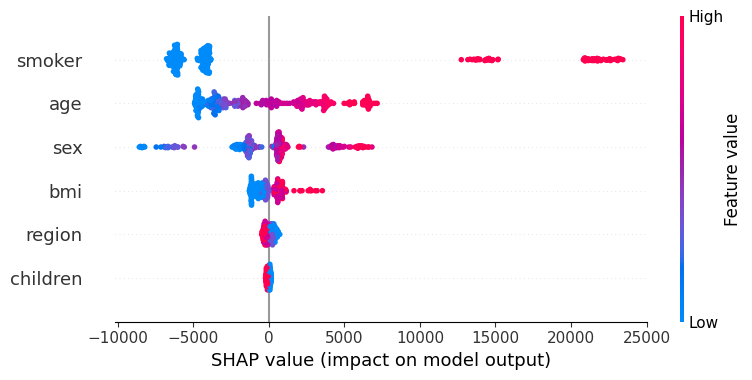

Waterfall plot for the first observation


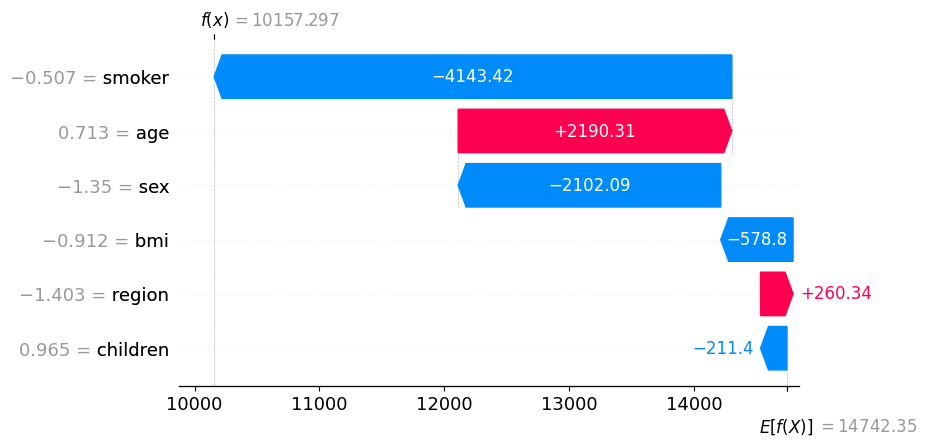

Mean SHAP values bar plot


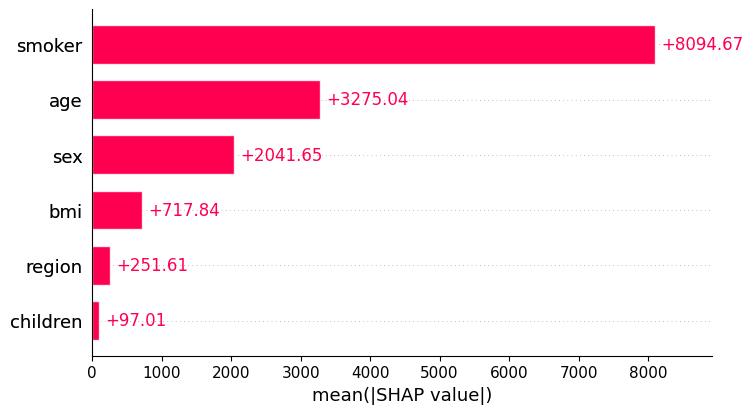

Beeswarm plot


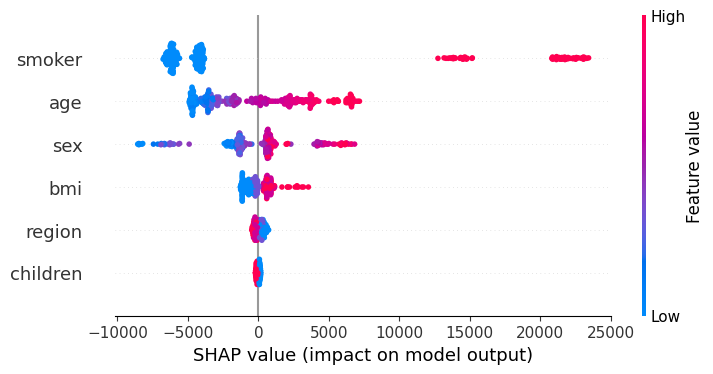

In [75]:
# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_test_processed_df)

# Calculate SHAP values
shap_values = explainer(X_test_processed_df, check_additivity=False)

# Global Feature Importance Plot (Summary Plot)
print(f"Global Feature Importance Plot (Summary Plot)")
shap.summary_plot(shap_values, X_test_processed_df)

# Local Explanation for a Single Prediction (Waterfall Plot)
print(f"Waterfall plot for the first observation")
shap.plots.waterfall(shap_values[0])
        
# Mean SHAP values in bar plot
print(f"Mean SHAP values bar plot")
shap.plots.bar(shap_values)
        
# Beeswarm plot for the cluster
print(f"Beeswarm plot")
shap.plots.beeswarm(shap_values)

<div style="color:#008B8B; font-size:24px;">
- The features 'region' and 'children' exhibit low feature importance, indicating that they have minimal impact on the model's predictions and do not significantly affect its performance. <br>
- In contrast, the features 'smoker', 'age', 'sex', and 'bmi' show a strong influence on the insurance cost prediction, highlighting their key role in driving the model's decision-making process. <br>
</div>


<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">11) Building the Application</span>
</div>

Not covered in this notebook

<div style="background-color:#FFF3CD; padding: 10px; border-radius: 5px;">
  <span style="color:#28A745; font-weight:bold;">12) Deployment</span>
</div>

Not covered in this notebook